# Data exploration

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically, by using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships
- Use plot aesthetics to project multiple dimensions 
- Apply conditioning or faceting methods to project multiple dimensions

This notebook contains an introduction to the methods data scientists use to prepare and explore a data set. Data scientists spend a lot of time manipulating data to clean and prepare it (**data munging**) and to understand the relationships within the variables in the data (**data exploration**). Visualization is a key skill for any data scientist performing these tasks. 

Before performing any type of inference or machine learning on a data set, you should develop an understanding of the relationships in the data set. Skipping this step can lead to wasted time from unexpected problems when building models, or in constructing models with poor performance. When starting any data science project, it is a good idea to plan on spending considerable time exploring the data. These exploration steps are often performed in conjunction with data cleaning and preparing, as visualization often highlights problems with data.

In [1]:
# import sys
# !{sys.executable} -m pip install statsmodels==0.13.2
# !{sys.executable} -m pip install mlxtend==0.21.0
# !{sys.executable} -m pip install graphviz==0.20.1

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

sns.set(rc = {'figure.figsize': (10, 8)})

### About the data set

This data set is from the [Canadian Open Government website](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/87fc1b5e-fafc-4d44-ac52-66656fc2a245#additional-info)  and the [Canadian Association of Road Safety Professionals](https://www.carsp.ca/research/resources/canadian-vehicle-specifications/).

##### Columns
- **make** - vehicle make
- **short_model_name** - short model name
- **overall_length_cm, overall_width_cm , overall_height_cm, wheelbase_cm** - dimensions of vehicle in cm
- **curb_weight_kg** - weight of vehicle
- **weight_distribution_pct_front** -percent of the vehicle weight supported by the front axle
- **vehicle_class** - type of vehicle
- **engine_size_l** - engine size in liters
- **cylinders** number of engine cylinders
- **transmission** - manual or various types of automatic transmission
- **fuel** - regular gas, premium_gas or diesel
- **fuel_consumption_mpg** - miles per gallon of fuel for combined ratings (55% city, 45% hwy)
- **smog** - tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)
- **full_model_name** - full vehicle description

## Load and examine the data

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. The result is a Pandas data frame.

Execute the code in this cell to load the data into your notebook. **Make sure the canadian_cars_2022.csv file path is correct from your working directory!**

In [3]:
def read_auto_data(file = "../../data/canadian_cars_2022.csv"):
    'Function to load the auto data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    df = pd.read_csv(file)
    
    ## Split the number of gears from the type of transmission, decode fuel
    df['gears'] = df['transmission'].str.extract(r'([0-9]+)').astype('Int64')
    df['gears'] = df['gears'].fillna(1) # "gearless" continuously_variable vehicles
    df['fuel'].replace({'X': 'regular_gas', 
                             'Z': 'premium_gas', 
                             'D': 'diesel'}, inplace = True)
    df['transmission'] = df['transmission'].str.extract(r'([A-Z]+)')
    df['transmission'].replace({'A': 'automatic', 
                             'AM': 'automated_manual', 
                             'AS': 'automatic_select_shift', 
                             'AV': 'continuously_variable', 
                             'M': 'manual'}, inplace = True)
    
    ## Remove rows with missing values
    df = df.dropna(axis = 0).reset_index(drop= True)
    return df


auto_df = read_auto_data()

/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_59437/3129372781.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel'].replace({'X': 'regular_gas',
/var/folders/72/0bcyzdyx7h3cvbp3wdsv12gh0000gn/T/ipykernel_59437/3129372781.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Next, have a first look at the dimensions and data types of the column of the data frame.

In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make                           210 non-null    object 
 1   short_model_name               210 non-null    object 
 2   overall_length_cm              210 non-null    float64
 3   overall_width_cm               210 non-null    float64
 4   overall_height_cm              210 non-null    float64
 5   wheelbase_cm                   210 non-null    float64
 6   curb_weight_kg                 210 non-null    float64
 7   weight_distribution_pct_front  210 non-null    float64
 8   vehicle_class                  210 non-null    object 
 9   engine_size_l                  210 non-null    float64
 10  cylinders                      210 non-null    int64  
 11  transmission                   210 non-null    object 
 12  fuel                           210 non-null    obj

Some key things to notice here are:

- There are 210 rows or cases in the data set.
- The data set has 16 variables or columns.
- Columns have a type of either `object` (character), `float64` (floating point number), or `int64` (integer). 


## Basic summary statistics

You can also learn a lot about a data set by looking at statistical summaries. The Pandas `describe` method does just this. Execute the code in the cell below and note the result.

In [5]:
with pd.option_context('display.float_format', '{:0.2f}'.format):
    display(auto_df.describe())

,overall_length_cm,overall_width_cm,overall_height_cm,wheelbase_cm,curb_weight_kg,weight_distribution_pct_front,engine_size_l,cylinders,fuel_consumption_mpg,smog,gears
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,480.51,189.42,160.49,285.62,1817.78,55.46,2.65,4.99,29.69,5.17,7.34
std,37.69,8.55,18.49,23.82,360.08,4.11,1.06,1.61,7.07,1.55,2.26
min,364.00,160.00,114.00,231.00,940.00,38.00,1.20,3.00,13.00,1.00,1.00
25%,459.00,184.00,145.00,270.00,1571.00,53.00,2.00,4.00,26.00,5.00,7.00
50%,478.00,189.00,164.00,283.00,1802.00,56.00,2.30,4.00,29.00,5.00,8.00
75%,500.00,196.75,173.75,299.75,2028.75,58.75,3.00,6.00,33.00,7.00,8.00
max,613.00,206.00,200.00,398.00,2721.00,64.00,6.70,12.00,67.00,7.00,10.00


Notice, that summary statistics are only provided for numeric columns. For these column this summary provides some useful information:

- The minimum and maximum values of each variable are displayed.
- The quantiles are shown; 25%, 50% (median), 75%. Note that, for several of these variables, the upper interquartile ranges (IQR) are different from the lower IQR, indicating the distributions are skewed. 
- The mean is displayed. Compare the mean and the median, noting that they can be quite different, like in the case of cylinders. This is a sign of a skewed distribution. 
- The standard deviation gives a measure of the dispersion of the values.

We can also obtain relevant summary statistics for categorical columns using the `include = 'object'`, which limits the columns to those of type `object`.

In [6]:
auto_df.describe(include = 'object')

,make,short_model_name,vehicle_class,transmission,fuel,full_model_name
count,210,210,210,210,210,210
unique,36,209,14,4,3,210
top,audi,grand,SUV: Small,automatic_select_shift,regular_gas,ILX 4DR SEDAN
freq,14,2,65,100,112,1


Next, let's look at the first and last few lines of the data frame using the `head` and `tail` methods.

In [7]:
auto_df.head(6)

,make,short_model_name,overall_length_cm,overall_width_cm,overall_height_cm,wheelbase_cm,curb_weight_kg,weight_distribution_pct_front,vehicle_class,engine_size_l,cylinders,transmission,fuel,fuel_consumption_mpg,smog,full_model_name,gears
0,acura,ilx,462.0,180.0,141.0,267.0,1415.0,60.0,Compact,2.4,4,automated_manual,premium_gas,33,3,ILX 4DR SEDAN,8
1,acura,mdx,504.0,200.0,170.0,289.0,2044.0,60.0,SUV: Small,3.5,6,automatic_select_shift,premium_gas,25,5,MDX 4DR SUV AWD,10
2,acura,rdx,474.0,190.0,167.0,275.0,1830.0,57.0,SUV: Small,2.0,4,automatic_select_shift,premium_gas,29,6,RDX 4DR SUV,10
3,acura,tlx,494.0,191.0,143.0,287.0,1781.0,57.0,Compact,2.0,4,automatic_select_shift,premium_gas,29,7,TLX 4DR SEDAN AWD,10
4,alfa romeo,stelvio,469.0,190.0,165.0,282.0,1660.0,52.0,SUV: Small,2.0,4,automatic,premium_gas,30,3,STELVIO BASE/Ti,8
5,aston martin,db11,476.0,194.0,128.0,281.0,1854.0,49.0,Minicompact,4.0,8,automatic,premium_gas,25,5,DB11,8


In [8]:
auto_df.tail(6)

,make,short_model_name,overall_length_cm,overall_width_cm,overall_height_cm,wheelbase_cm,curb_weight_kg,weight_distribution_pct_front,vehicle_class,engine_size_l,cylinders,transmission,fuel,fuel_consumption_mpg,smog,full_model_name,gears
204,volvo,s90,496.0,189.0,144.0,294.0,1921.0,56.0,Mid-size,2.0,4,automatic_select_shift,premium_gas,31,7,S90 4DR SEDAN T6 AWD,8
205,volvo,v60,478.0,185.0,150.0,287.0,1820.0,56.0,Station wagon: Small,2.0,4,automatic_select_shift,premium_gas,29,7,V60 CROSS COUNTRY 4DR WAGON,8
206,volvo,v90,494.0,189.0,144.0,294.0,1880.0,54.0,Station wagon: Mid-size,2.0,4,automatic_select_shift,premium_gas,30,7,V90 4DR WAGON,8
207,volvo,xc40,443.0,186.0,165.0,270.0,1688.0,59.0,SUV: Small,2.0,4,automatic_select_shift,regular_gas,30,5,XC40 4DR SUV,8
208,volvo,xc60,469.0,190.0,166.0,287.0,1869.0,55.0,SUV: Small,2.0,4,automatic_select_shift,premium_gas,30,5,XC60 4DR SUV,8
209,volvo,xc90,495.0,201.0,178.0,298.0,2052.0,53.0,SUV: Standard,2.0,4,automatic_select_shift,premium_gas,28,5,XC90 4DR SUV AWD T5 / T6,8


### Exercise

Say we wanted to examine the `overall_length_cm` column in the data. We already saw that we can use `describe`.

In [9]:
auto_df[['overall_length_cm']].describe()

,overall_length_cm
count,210.000000
mean,480.514286
std,37.691042
min,364.000000
25%,459.000000
50%,478.000000
75%,500.000000
max,613.000000


Using the `seaborn` library, we can plot a line plot of `length` against the index of the data `auto_df.index`:

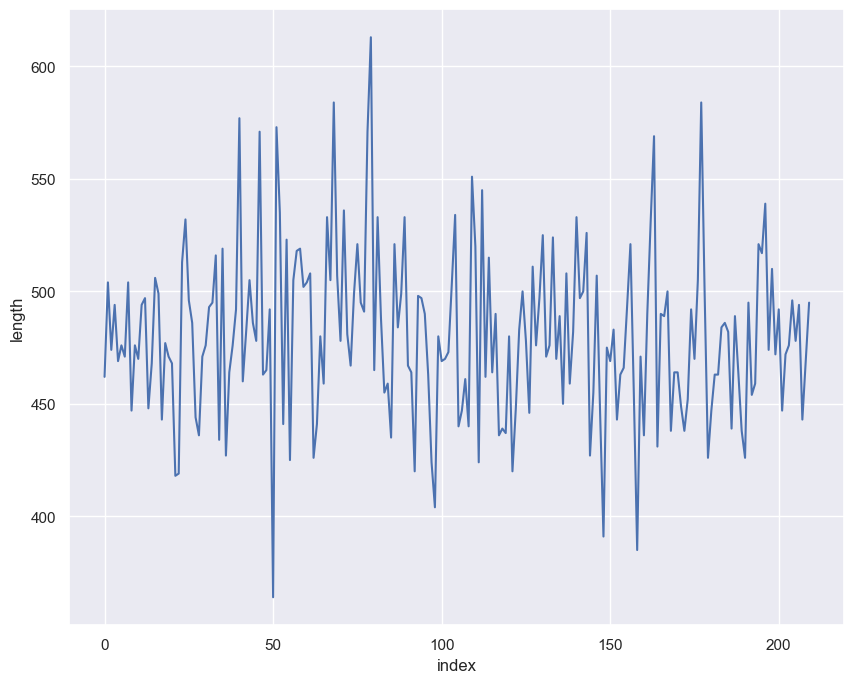

In [10]:
sns.lineplot(x = auto_df.index, 
             y = 'overall_length_cm', 
             data = auto_df
            ).set(xlabel = 'index', 
                  ylabel = 'length');

- Do you find the above visualization useful? When can it be useful and when not?

- Sort the data by `overall_length_cm` and reset the index of the data, then recreate the above plot. Do you find the new plot useful?

In [11]:
## your code goes here

- Run the `nlargest` method to show the top 10 values for `overall_length_cm`. Can you show these values on the plot above?

In [12]:
## your code goes here

If the data is really big, instead of plotting `overall_length_cm` itself, we can use the `quantile` method to obtain percentiles for `overall_length_cm` and plot those instead. 

- Use `quantile` to obtain the 0th, 1st, 2nd, 3rd, ..., 100th percentile for `overall_length_cm` and plot the percentiles. HINT: Use `np.arange(0, 1.01, 0.01)` to get the percentiles all at once.

In [13]:
## your code goes here

- Do the results look similar to what we saw earlier?

### End of exercise

## Frequency tables

The `groupby` method can be used to get separate summary statistics for each category in a categorical column. The `agg` or aggregation method can be used to specify which summary statistics we want. In this case, we will use the `count` operator to get counts of rows in each category of the variable. 

In [14]:
auto_df.groupby(['make']
      ).agg(
            model_count = ('short_model_name', 'count')
          ).head()

,model_count
make,
acura,4
alfa romeo,1
aston martin,4
audi,14
bentley,2


We can look at frequencies of a combinations of two categorical variables, such combinations are also known as **interactions**. The groups are organized by the order of the columns specified.

In [15]:
auto_df.groupby(['make', 'fuel']
      ).agg(
            model_count = ('short_model_name', 'count')
           ).head()

model_count
make         fuel                    
acura        premium_gas            4
alfa romeo   premium_gas            1
aston martin premium_gas            4
audi         premium_gas           12
             regular_gas            2

The above table gives us a feel for which manufactures only make gas cars and which ones make both gas and diesel cars, and how many of each. Notice that groups with counts of zero do not display in the table. 

When we look at interactions of two columns, the result is also called a **two-way table**. Similarly, we can have **three-way tables**, and so on.

In [16]:
auto_df.groupby(['make', 'fuel', 'cylinders']
      ).agg(
            model_count = ('short_model_name', 'count')
           ).head()

model_count
make         fuel        cylinders             
acura        premium_gas 4                    3
                         6                    1
alfa romeo   premium_gas 4                    1
aston martin premium_gas 8                    3
                         12                   1

Notice that with three levels the table takes a bit more effort to examine. As the number of grouping levels increases, frequency tables become progressively more difficult to understand. 

### Exercise

- Create and execute the code to create a frequency table of cars by `vehicle_class` and `cylinders`.

In [17]:
## your code goes here

- Which vehicle class and cylinder engine configuration is the most frequent?
- Ignoring missing values, which vehicle class and cylinder engine configurations are the least frequent?
- What happens to the results if we add the `unstack()` method to the end?

In [18]:
## your code goes here

- Create the same frequency table using [pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) instead. What is the advantage of using `pd.crosstab`? What are the `normalize` and `margin` arguments used for?

In [19]:
## your code goes here

Visualize the result of `pd.crosstabs` above, using `sns.heatmap`. Decide if you should normalize and by which dimension. You can change the color map using the [cmap parameter](https://matplotlib.org/stable/tutorials/colors/colormaps.html). For example, try cmap = 'cividis' and see how the visualization changes.

In [20]:
## your code goes here

### End of exercise

## Basic univariate charts

In this notebook we work with a number of common univariate chart types. By univariate we mean that it is a summary of only a single variable.

- **bar plots**
- **histograms**
- **box plots**
- **line plots**

### Bar plots

To start our exploration of these data we will work with bar plots. Bar plots are used to display the counts or frequency of unique values of a categorical variable. The length of the bar represents the count for each unique category of the variable.

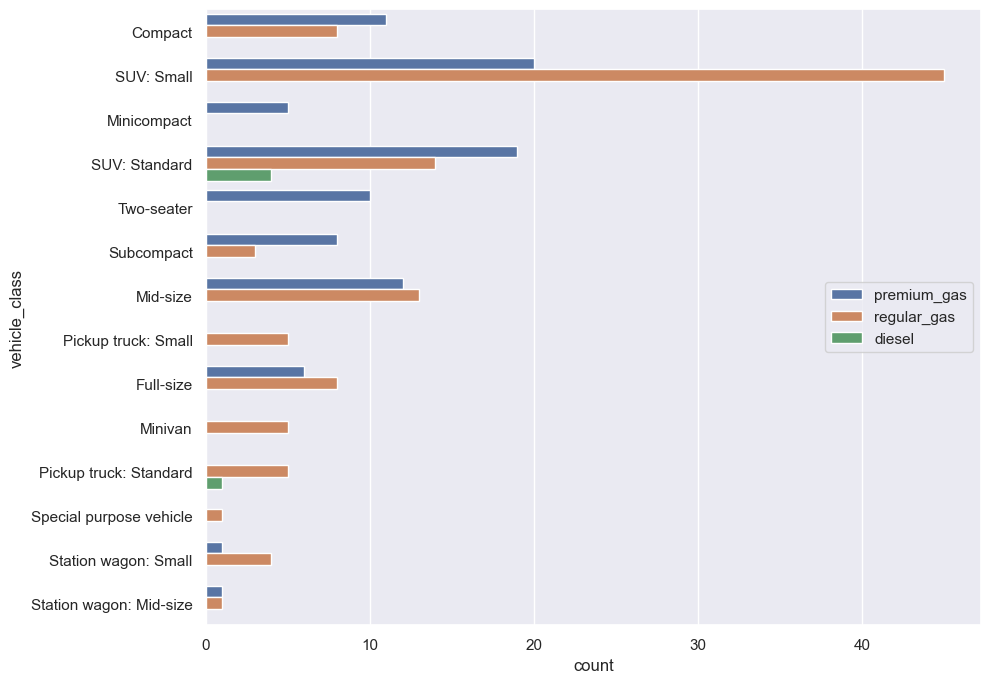

In [21]:
ax = sns.countplot(y = 'vehicle_class', 
              hue = 'fuel', 
              data = auto_df)
ax.legend(loc = 'right');

From this display you can see that the most frequent body type is the small SUV and the least frequent is the special purpose vehicle, and diesels make up a small percentage of cars overall.

### Exercise

It would be easier to understand this plot if the frequencies of the categories were ordered. This would be particularly true if there were a large number of categories or categories with similar counts. 

- Use the `value_counts()` method to get a list where each `body-style` is ordered by frequency, then use the `order` argument in `countplot` to reorder the data.

In [22]:
## your code goes here

- Compare the relationship between the number of gears and the style of transmission using one of the above techniques.
- What types of tranmissions are most common? 
- How does the type of transmission for the vehicle with only one gear impact your opinion on if this data point is correct?

In [23]:
## your code goes here

### End of exercise

The examples above use `countplot`, but we can also use the more general `catplot` function to create bar plots. 

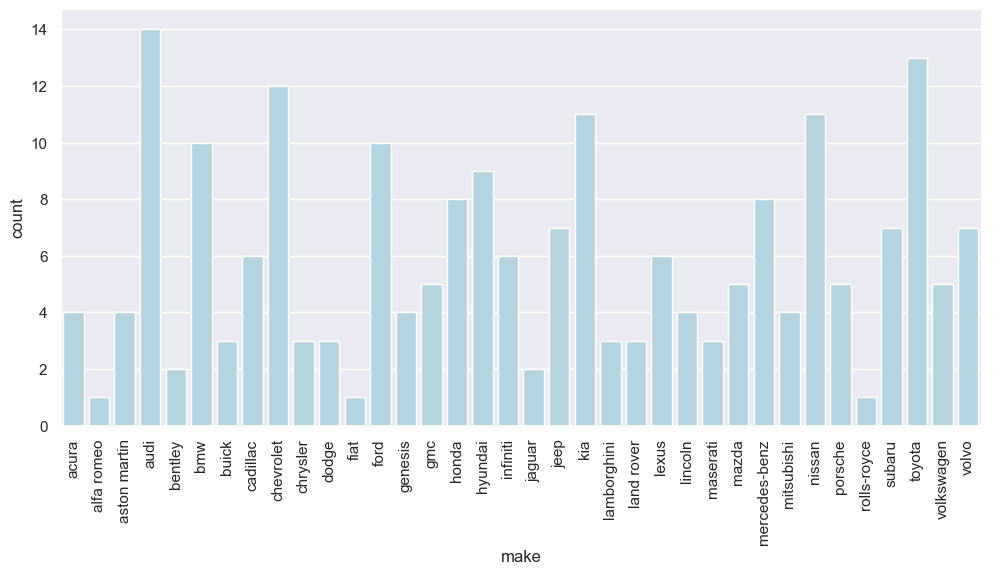

In [24]:
g = sns.catplot(x = 'make', 
                data = auto_df, 
                kind = 'count', 
                color = 'lightblue', 
                aspect = 2)
g.set_xticklabels(rotation = 90);

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

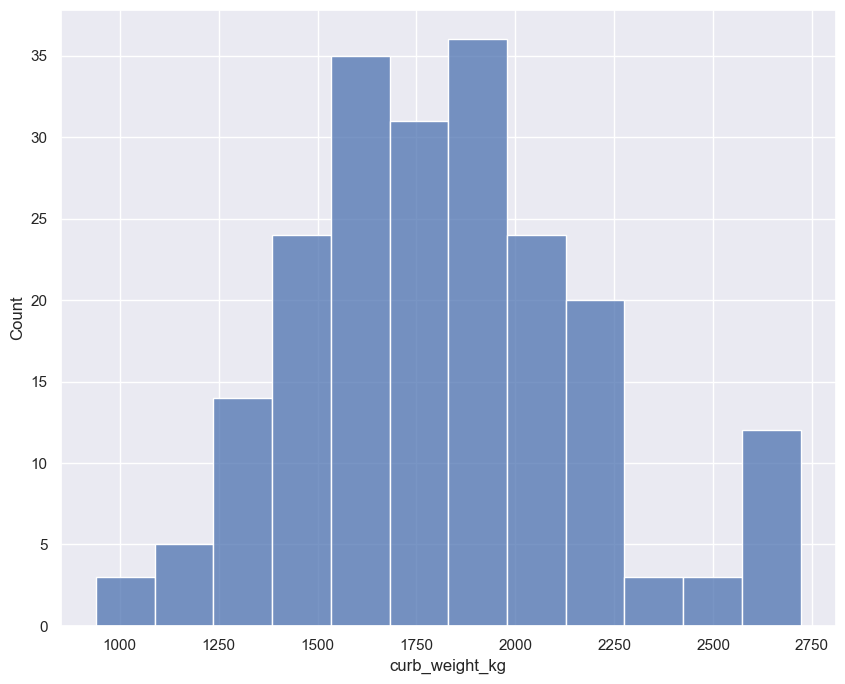

In [25]:
sns.histplot(auto_df['curb_weight_kg'], kde = False);

The histogram shows that the weight of automobiles are roughly normally distributed, with a cluster of much heavier vehicles.

### Box plots

Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation.

In [26]:
auto_df[['curb_weight_kg']].describe()

,curb_weight_kg
count,210.000000
mean,1817.780952
std,360.080785
min,940.000000
25%,1571.000000
50%,1802.000000
75%,2028.750000
max,2721.000000


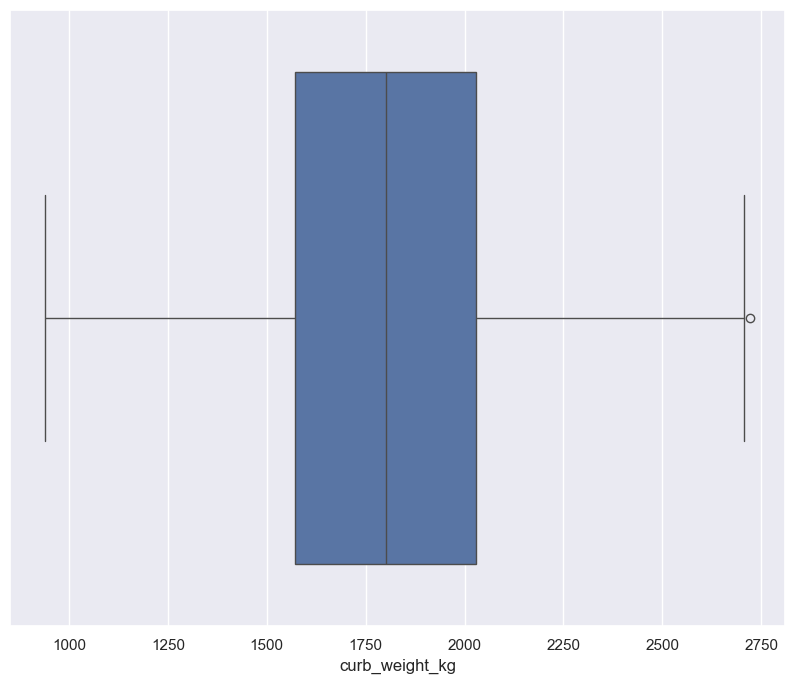

In [27]:
ax = sns.boxplot(x = 'curb_weight_kg', 
                 data = auto_df);

Compare the above plot to the histogram of weight. You can see from both plots that the distribution of weight is fairly symmetric. Further, there are a number of heavy cars that appear as outliers. 

The above plot is quite basic. Most importantly, this plot lacks the annotation required for someone to quickly understand it. At the minimum a title and an axis label are required. Fortunately, adding these attributes to the plot is relatively easy, since matplotlib provides methods to do so. 

There is another issue with this plot. Notice that the limits of the x axis does not include `0`, which can distort the observer's view of the data. This is particularly the case when making comparisons between variables, of subsets of variables. So we use the `set_xlim` method to reset the axis.

### Exercise

Box plots can be especially helpful when comparing different categories. 

- Display a box plot of auto weight grouped by both `fuel` and `gears`.

In [28]:
## your code goes here

- Are diesel cars generally heavier than vehicles using gas? 
- What type of vehicles tend to be the lightest?
- Which type of car shows the greatest weight range? The most outliers?

### End of exercise

# Assignment

In this assignment, we look at some examples of third-party packages for EDA and visualizaiton. The data that we use is time series data. Time series data is very common and dealing with time series data sometimes requires that we take special care. The time series we use in this assignment has the monthly number of subspots between 1749 and 2013. 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (8, 8)})
sunspots = pd.read_csv('../../data/sunspots.csv')

- Convert the timestamp column into `datetime` and then set it as the index of the data. This is how we can let pandas know that we have a time series data. <span style="color:red" float:right>[2 point]</span>

In [ ]:
## your code goes here

- Create a line plot of this time series, using the index in the x-axis. <span style="color:red" float:right>[1 point]</span>

In [ ]:
## your code goes here

- The code at the beginning of the assignment set the figure size to a square aspect ratio of 8 by 8. Modify that code so the plot has a more pleasing wide aspect ratio. <span style="color:red" float:right>[1 point]</span>

In [ ]:
## your code goes here

It is often helpful to smooth out a time series plot using a moving average. In `pandas`, we can easily calculate moving averages (or other statistic) using the `rolling` method. An example is shown below.

In [ ]:
x = pd.Series([5, 9, 10, 4, 8])
x.rolling(3).mean()

- State why the first two values of series above are `NaN`. <span style="color:red" float:right>[2 point]</span>

In [ ]:
## your answer goes here (no code required)

- Create a new plot that shows both the original time series and the smoothed out time series using a rolling average with the window size set to 24. Your plot should include labels to indicate which line plot is which, such as 'original' and 'rolling average'. <span style="color:red" float:right>[5 point]</span>

In [ ]:
## your code goes here

Another way to smooth out the data is to aggregate the data from monthly to yearly. There are different ways of doing that, but the easiest way is by using the `resample` method, as shown [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Since we are going from monthly data to yearly, we call this **downsampling**. We can also use `resample` to **upsample** the data.

- Use resample to aggregate the data to yearly totals, then plot a line plot of the data. <span style="color:red" float:right>[5 point]</span>

In [ ]:
## your code goes here

The plot should show the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

# End of assignment